In [2]:
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

In [3]:
def df_to_X_y2(df, window_size=6):
    df_as_np = df.to_numpy()
    X = []
    y = []
    
    for i in range(len(df_as_np)-window_size):
        row = [r for r in df_as_np[i:i+window_size]]
        X.append(row)
        label = df_as_np[i+window_size][6]
        y.append(label)
    
    return np.array(X), np.array(y)

In [4]:
df=pd.read_csv("train_data.csv")
df_to_X_y2(df)
X2_train, y2_train =df_to_X_y2(df)
df1=pd.read_csv("val_data.csv")
X2_val, y2_val = df_to_X_y2(df1)
df2=pd.read_csv("test_data.csv")
X2_test, y2_test = df_to_X_y2(df2)
X2_train.shape, y2_train.shape, X2_val.shape, y2_val.shape, X2_test.shape, y2_test.shape

((2836506, 6, 25),
 (2836506,),
 (945498, 6, 25),
 (945498,),
 (945498, 6, 25),
 (945498,))

In [5]:
model4 = Sequential()
model4.add(InputLayer((6,25)))
model4.add(LSTM(64))
model4.add(Dense(8, 'relu'))
model4.add(Dense(1, 'linear'))

model4.summary()

Metal device set to: Apple M1
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                23040     
                                                                 
 dense (Dense)               (None, 8)                 520       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 23,569
Trainable params: 23,569
Non-trainable params: 0
_________________________________________________________________


In [6]:
cp4 = ModelCheckpoint('model4/', save_best_only=True)
model4.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

model4.fit(X2_train, y2_train, validation_data=(X2_val, y2_val), epochs=3, callbacks=[cp4])

Epoch 1/3


2023-04-04 20:49:41.530336: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


88641/88641 [==============================] - ETA: 0s - loss: 40825.3125 - root_mean_squared_error: 202.0527

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


88641/88641 [==============================] - 802s 9ms/step - loss: 40825.3125 - root_mean_squared_error: 202.0527 - val_loss: 11699.6709 - val_root_mean_squared_error: 108.1650
Epoch 2/3
88641/88641 [==============================] - ETA: 0s - loss: 12528.8438 - root_mean_squared_error: 111.9323

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


88641/88641 [==============================] - 793s 9ms/step - loss: 12528.8438 - root_mean_squared_error: 111.9323 - val_loss: 11114.3105 - val_root_mean_squared_error: 105.4244
Epoch 3/3
88641/88641 [==============================] - ETA: 0s - loss: 12304.9512 - root_mean_squared_error: 110.9277

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


88641/88641 [==============================] - 784s 9ms/step - loss: 12304.9512 - root_mean_squared_error: 110.9277 - val_loss: 10954.5703 - val_root_mean_squared_error: 104.6641


29547/29547 [==============================] - 63s 2ms/step


(        Predictions  Actuals
 0         52.590389    55.13
 1         51.872147    55.13
 2         52.806820    55.13
 3         52.371616    55.13
 4         52.728565    55.13
 ...             ...      ...
 945493   823.712280   601.44
 945494   602.871216   673.79
 945495   682.110840   999.36
 945496   917.143921  1100.89
 945497   964.152344  1181.49
 
 [945498 rows x 2 columns],
 11661.820582350241)

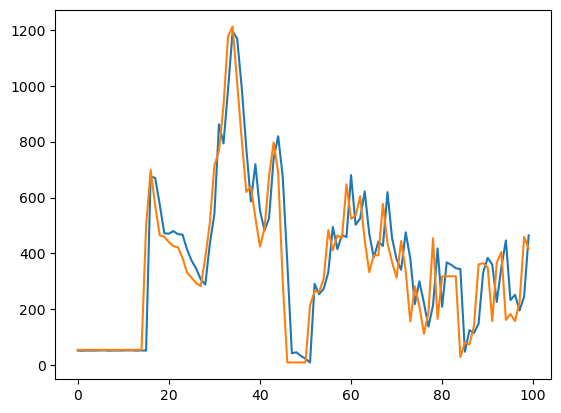

In [7]:
from sklearn.metrics import mean_squared_error as mse

def plot_predictions1(model, X, y, start=0, end=100):
    predictions = model.predict(X).flatten()
    df = pd.DataFrame(data={'Predictions':predictions, 'Actuals':y})
    plt.plot(df['Predictions'][start:end])
    plt.plot(df['Actuals'][start:end])
    return df, mse(y, predictions)

plot_predictions1(model4, X2_test, y2_test)